In [9]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import adjusted_rand_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import prince
from sklearn.mixture import GaussianMixture
from sklearn.utils import check_random_state

In [3]:
mcdonalds = pd.read_csv("mcdonalds.csv")
mcdonalds.head()



,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:

MD_x = mcdonalds.iloc[:, 1:12].applymap(lambda x: 1 if x == "Yes" else 0)
print(np.round(MD_x.mean(), 2))

convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
Like          0.00
dtype: float64


In [5]:
MD_pca = PCA().fit(MD_x)

# Explained variance ratio
explained_variance_ratio = np.round(MD_pca.explained_variance_ratio_, 2)
print(explained_variance_ratio)

# Principal components
components = MD_pca.components_
print(components)

# Singular values
singular_values = MD_pca.singular_values_
print(singular_values)

# Mean of each feature
feature_means = MD_pca.mean_
print(feature_means)

[0.3  0.19 0.13 0.1  0.06 0.06 0.05 0.05 0.04 0.03 0.  ]
[[-0.15222071 -0.00132849  0.13175506  0.35042294 -0.13435956 -0.51012708
  -0.35886306  0.51181853 -0.2074227   0.35302161  0.        ]
 [ 0.06712002  0.01462136 -0.18689384 -0.45473366 -0.05349595 -0.50171502
   0.37391704  0.44668359  0.22105571 -0.33284159  0.        ]
 [-0.17642248 -0.0655621  -0.27131751 -0.65159168 -0.09791477  0.00606812
  -0.62631558 -0.10988566  0.08170572  0.21388267  0.        ]
 [-0.11427391  0.21133138 -0.34343557  0.29494215 -0.08272792  0.11038836
   0.0621956   0.08082229  0.77873682  0.31856018 -0.        ]
 [-0.15940701  0.09169811  0.14010445 -0.33748334  0.03083033  0.13742978
   0.51862889  0.08714178 -0.21206419  0.70091249  0.        ]
 [-0.38889408 -0.24291352 -0.43287131  0.15865381 -0.61659312 -0.08426298
   0.23749281 -0.24709203 -0.25896685 -0.07346666 -0.        ]
 [ 0.02208865  0.85941679 -0.35678723  0.02414415  0.0584571  -0.02373038
  -0.04522812 -0.03398655 -0.34351013 -0.088625

C:\Users\nimat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


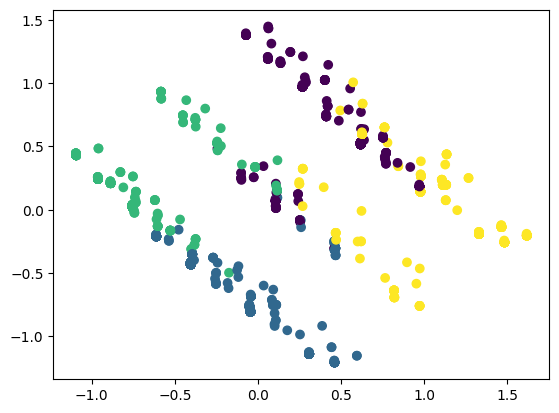

In [6]:
MD_kmeans = KMeans(n_clusters=4, random_state=1234).fit(MD_x)
plt.scatter(MD_pca.transform(MD_x)[:, 0], MD_pca.transform(MD_x)[:, 1], c=MD_kmeans.labels_, cmap='viridis')
plt.show()

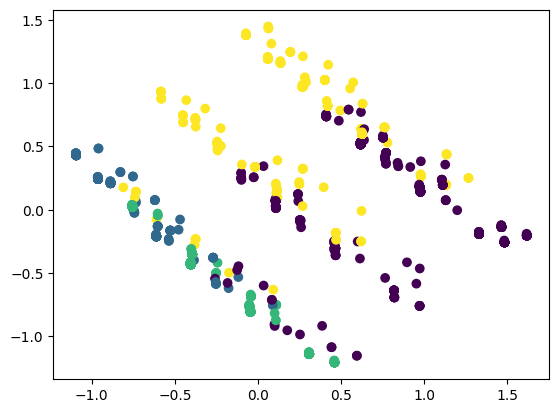

In [7]:
MD_gmm = GaussianMixture(n_components=4, random_state=1234).fit(MD_x)
plt.scatter(MD_pca.transform(MD_x)[:, 0], MD_pca.transform(MD_x)[:, 1], c=MD_gmm.predict(MD_x), cmap='viridis')
plt.show()

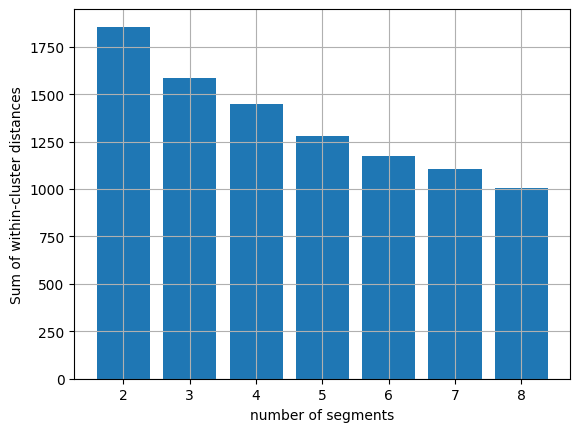

In [10]:
random_state = check_random_state(1234)

k_values = range(2, 9)
nrep = 10

within_cluster_distances = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=random_state, n_init=nrep)
    kmeans.fit(MD_x)
    within_cluster_distances.append(kmeans.inertia_)

plt.bar(k_values, within_cluster_distances)
plt.xlabel("number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.grid(True)
plt.show()